# Running LLM Locally with `Ollama`

In [1]:
# pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ollama
from PIL import Image
import base64
import io
import matplotlib.pyplot as plt

In [3]:
def load_image(image_path, image_size=None, format='png'):
    with open(image_path, 'rb') as img_file:
        img = Image.open(img_file)
        if image_size is not None:
            img = img.resize(image_size) 
        buffered = io.BytesIO()
        img.save(buffered, format=format)
        img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

In [4]:
def visualize_base64_image(img_str):
    # Decode the base64 string to bytes
    img_data = base64.b64decode(img_str)
    
    # Convert bytes to a PIL Image
    img = Image.open(io.BytesIO(img_data))
       
    # Optionally, display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

## Llama2

Download a model running `ollama pull llama2` in the terminal.

In [5]:
response = ollama.chat(model='llama2', messages=[
    {
        'role': 'user',
        'content': 'Who are you?'
    },
])

In [6]:
response

{'model': 'llama2',
 'created_at': '2024-07-04T09:59:52.3230712Z',
 'message': {'role': 'assistant',
  'content': '\nI am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I am trained on a massive dataset of text from the internet and can generate human-like responses to a wide range of topics and questions. I can be used to create chatbots, virtual assistants, and other applications that require natural language understanding and generation capabilities.'},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 34638763500,
 'load_duration': 6801450700,
 'prompt_eval_count': 24,
 'prompt_eval_duration': 1946160000,
 'eval_count': 85,
 'eval_duration': 25885232000}

In [7]:
print(response['message']['content'])


I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I am trained on a massive dataset of text from the internet and can generate human-like responses to a wide range of topics and questions. I can be used to create chatbots, virtual assistants, and other applications that require natural language understanding and generation capabilities.


## Llama3

Download a model running `ollama pull llama3:8b` in the terminal.

In [9]:
response = ollama.chat(model='llama3:8b', messages=[
    {
        'role': 'user',
        'content': 'Who are you?'
    },
])

In [10]:
response

{'model': 'llama3:8b',
 'created_at': '2024-07-04T10:05:15.1101135Z',
 'message': {'role': 'assistant',
  'content': "I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but rather a computer program designed to simulate conversation, answer questions, and even generate text based on the input I receive.\n\nMy training data includes a massive amount of text from various sources, which allows me to learn about many topics, including history, science, technology, literature, and more. This knowledge base enables me to understand natural language, recognize context, and respond accordingly.\n\nI'm designed to be helpful, informative, and engaging, making me a great companion for conversations or a valuable tool for those seeking information or assistance."},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 58440875900,
 'load_duration': 7360770900,
 'prompt_eval_count': 14,
 'prompt_eval_dura

In [11]:
print(response['message']['content'])

I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but rather a computer program designed to simulate conversation, answer questions, and even generate text based on the input I receive.

My training data includes a massive amount of text from various sources, which allows me to learn about many topics, including history, science, technology, literature, and more. This knowledge base enables me to understand natural language, recognize context, and respond accordingly.

I'm designed to be helpful, informative, and engaging, making me a great companion for conversations or a valuable tool for those seeking information or assistance.


## Mistral

Download a model running `ollama pull mistral` in the terminal.

In [12]:
response = ollama.chat(model='mistral', messages=[
    {
        'role': 'user',
        'content': 'Who are you?'
    },
])

In [13]:
print(response['message']['content'])

 I am a Large Language Model trained by Mistral AI.


## Gemma

In [15]:
response = ollama.chat(model='gemma', messages=[
    {
        'role': 'user',
        'content': 'Who are you?'
    },
])

In [16]:
print(response['message']['content'])

I am a conversational AI, trained to understand and generate human language. I am designed to assist and interact with users on various topics and provide helpful information based on the context of the conversation.


## Llava

Download a model running `ollama pull llava` in the terminal.

In [18]:
response = ollama.chat(model='llava', messages=[
    {
        'role': 'user',
        'content': 'Who are you?'
    },
])

In [19]:
print(response['message']['content'])

 I am an AI language model. 


In [21]:
image_path=r'C:\Users\fscielzo\Documents\Videos-Projects\ollama-llm-local\images\car.jpg'
image_base64 = load_image(image_path, format='png')

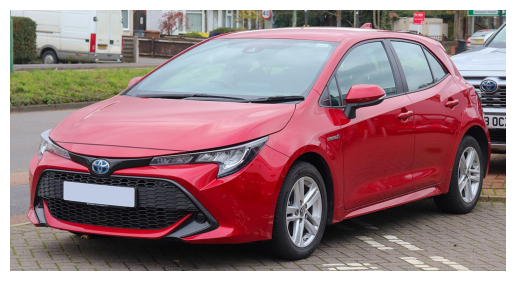

In [22]:
visualize_base64_image(image_base64)

In [25]:
final_response = ''
for response in ollama.generate(
                                model='llava:13b',
                                prompt='Can you describe this image in few words?',
                                images=[image_base64],
                                options={'temperature': 0.9, 'top_p': 0.8},
                                stream=True
                                ):
                print(response['response'], end='', flush=True)
                final_response += response['response']
# Time: 35 secs

 Red Toyota Prius parked in lot.

In [27]:
image_path=r'C:\Users\fscielzo\Documents\Videos-Projects\ollama-llm-local\images\cartoon.jpg'
image_base64 = load_image(image_path, format='png')

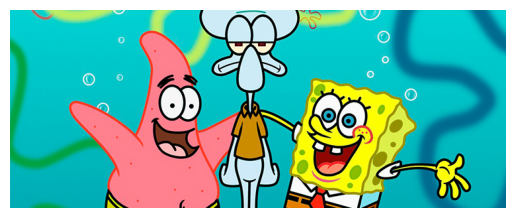

In [28]:
visualize_base64_image(image_base64)

In [29]:
final_response = ''
for response in ollama.generate(
                                model='llava:13b',
                                prompt='Can you describe this image in few words?',
                                images=[image_base64],
                                options={'temperature': 0.9, 'top_p': 0.8},
                                stream=True
                                ):
                print(response['response'], end='', flush=True)
                final_response += response['response']
# Time:  

 The image is a digital manipulation that combines characters from the animated television shows "SpongeBob SquarePants" and "Friends" in an underwater setting.